# Data Cookbook
by Arham Khan, for CS-215

This cookbook contains a summary of the useful techniques and skills I picked up this semester in our Intro to Data Science course. This cookbook contains necessary libraries and packages, visualizations and code, and other information I found pertinent to my learning. 

# Libraries and Packages

First, some important libraries and corresponding code.
The libraries listed are:
- pandas: this library facilitates working data tables, and allows easy data manipulation
- seaborn: seaborn is great for higher level work involving more nuanced and attractive graphics.
- requests: useful for making HTTP requests
- matplotlib: creates a plethora of data visualizations including charts and all sorts of plots.
- json: for encoding and decoding JSON
- numpy: numerical computing library

In [27]:
#importing pandas 
import pandas as pd 

#importing seaborn
import seaborn as sns

#importing requests
import requests

#importing matplotlib
import matplotlib.pyplot as plt

#importing json
import json

#importing numpy 
import numpy as np

# Reading Data

Reading data is one of the first steps for every project we did. Most data came in .csv files as well as some Excel files. The code below shows how to do this with .csv files. For excel files, the code remains the same except we switch .csv with .excel
Here, a simple dataset of average temperatures is used.

In [5]:
#reading data in .csv
df = pd.read_csv('average_temperatures.csv')
df

,Country,Year,AverageTemperature
0,USA,2010,14.9
1,USA,2011,21.2
2,USA,2012,13.9
3,USA,2013,18.2
4,USA,2014,10.8
5,USA,2015,23.6
6,USA,2016,20.9
7,USA,2017,11.2
8,USA,2018,20.6
9,USA,2019,24.3


# Exploration and Understanding

With the dataframe created, we can use different functions to glean relevant information for our statistical analysis.
For example, the temperature dataset covers different countries, and we wish to know how many unique countries there are. The code belows shows the implementation:

In [6]:
#displays all unique names in the dataset without repetition
unique_names = df['Country'].unique()
unique_names

array(['USA', 'Canada', 'Germany', 'India', 'Australia'], dtype=object)

In [7]:
#displays the max value (highest recorded temperature)
df.max()

Country                USA
Year                  2019
AverageTemperature    24.9
dtype: object

In [8]:
#displays the minimum value (lowest temperature recorded)
df.min()

Country               Australia
Year                       2010
AverageTemperature         10.1
dtype: object

In [9]:
#gives general info about the index range, no. of entries, columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             50 non-null     object 
 1   Year                50 non-null     int64  
 2   AverageTemperature  50 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ KB


In [10]:
#provides useful summary statistics
df.describe()

,Year,AverageTemperature
count,50.000000,50.000000
mean,2014.500000,17.976000
std,2.901442,4.524607
min,2010.000000,10.100000
25%,2012.000000,14.150000
50%,2014.500000,18.200000
75%,2017.000000,22.200000
max,2019.000000,24.900000


In [11]:
#displays a series containing counts of unique values
df.value_counts()

Country    Year  AverageTemperature
Australia  2010  24.1                  1
India      2017  22.2                  1
Germany    2017  18.4                  1
           2018  15.8                  1
           2019  13.6                  1
India      2010  21.9                  1
           2011  11.2                  1
           2012  17.5                  1
           2013  16.4                  1
           2014  22.8                  1
           2015  10.7                  1
           2016  19.9                  1
           2018  19.2                  1
Australia  2011  18.2                  1
India      2019  17.6                  1
USA        2010  14.9                  1
           2011  21.2                  1
           2012  13.9                  1
           2013  18.2                  1
           2014  10.8                  1
           2015  23.6                  1
           2016  20.9                  1
           2017  11.2                  1
           2018  20.6

# Visualizations and Data Manipulation

Exploring the data through proper visuals is incredibly useful. The most basic of these is a line scatter plot:

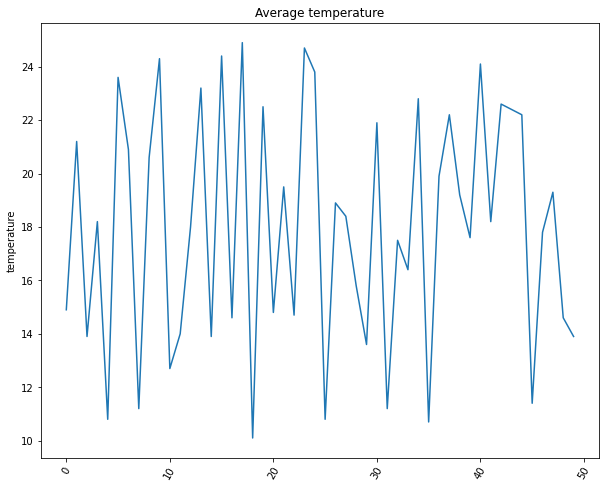

In [14]:
#sample plot
#setting axes point and figure size
fig, axs = plt.subplots(figsize = (10, 8))
df['AverageTemperature'].plot(kind = 'line', rot = 60, ax=axs)
#labelling titles
plt.ylabel("temperature")
plt.title("Average temperature")
#displaying the graph
plt.show()

We cannot gain enough insights yet, which is why it's important to manipulate and wrangle the data to get what we need. From a previous machine learning class, it's best to contain these nuanced explorations within a function:

In [18]:
def temperaturePlot(Country):
    df = pd.read_csv('average_temperatures.csv')
    
    if Country not in df['Country'].unique():
        print(f"{Country} is not in the dataset")
        return
    df_country = df.loc[df['Country']== Country]
    
    df_countrySelect = df_country.loc[:, ['Year', 'AverageTemperature']]
    
    plt.plot(df_countrySelect['Year'], df_countrySelect['AverageTemperature'], color = 'red', label = 'World Temperature Data')
    
    plt.xlabel('Year')
    plt.ylabel('AverageTemperature')
    plt.title(f'{Country} - dataset')
    
    plt.legend()
    
    plt.show()

In [22]:
#lets try with a fictional country not in the dataset
temperaturePlot('ArhamLand')

ArhamLand is not in the dataset


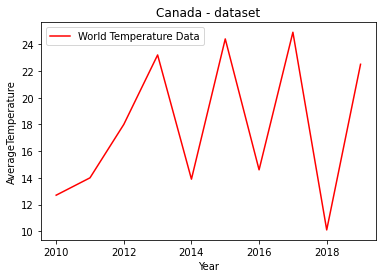

In [19]:
#Canada, which is in the dataset
temperaturePlot('Canada')

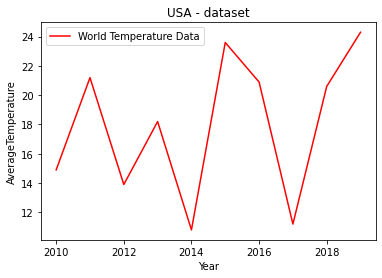

In [21]:
#similar example
temperaturePlot('USA')

Seaborn was another one of my favorite packages that we worked with, as it allows unique plots such as catplots, boxplots and displots

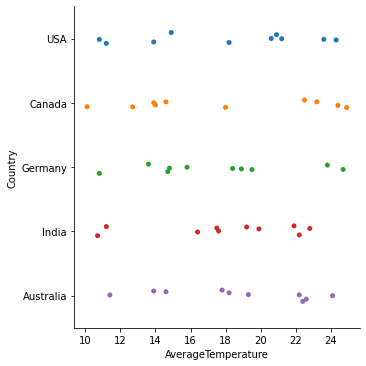

In [29]:
#simple catplot
sns.catplot(data=df, x="AverageTemperature", y="Country")

Since we have matplotlib imported as well, we can turn it into boxplot with titles and labels

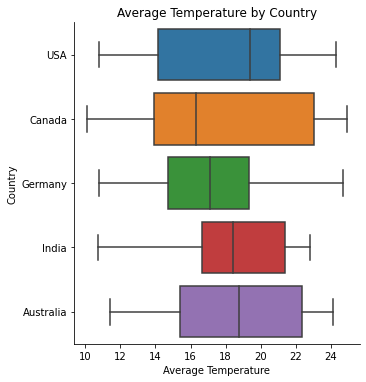

In [30]:
#boxplot
sns.catplot(data=df, x="AverageTemperature", y="Country", kind="box")
plt.title("Average Temperature by Country")
plt.xlabel("Average Temperature")
plt.ylabel("Country")
plt.show()

Suppose we want to switch the axes for the graph

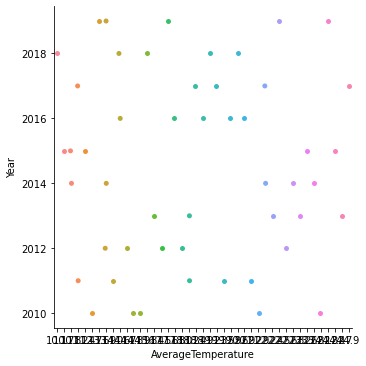

In [34]:
#reverse axes
sns.catplot(data=df, x="AverageTemperature", y= 'Year')

Displaying a displot with Seaborn:

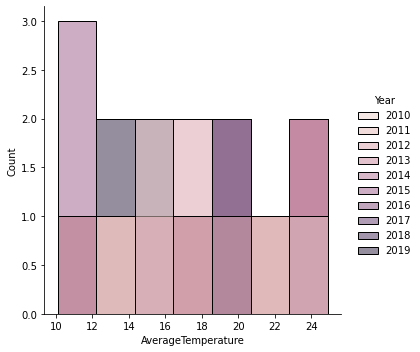

In [35]:
#displot
sns.displot(data = df, x = "AverageTemperature", hue = 'Year')

What if I only want to visualize for a specific country in the dataset. First, I need a more nuanced dataframe and then plot:

In [36]:
#creating and storing data for Canada
df_CanadaTemp = df[df["Country"]=='Canada'].dropna()
df_CanadaTemp

,Country,Year,AverageTemperature
10,Canada,2010,12.7
11,Canada,2011,14.0
12,Canada,2012,18.0
13,Canada,2013,23.2
14,Canada,2014,13.9
15,Canada,2015,24.4
16,Canada,2016,14.6
17,Canada,2017,24.9
18,Canada,2018,10.1
19,Canada,2019,22.5


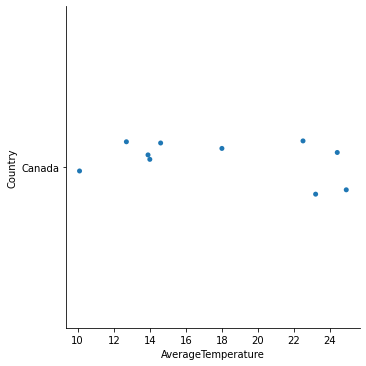

In [37]:
#catplot for Canada
sns.catplot(data=df_CanadaTemp, x = "AverageTemperature", y = "Country")

# Web Scraping

Besides visuals and data wrangling, web scraping is pretty important and a key skill in the course.
We need to import BeautifulSoup, as we already have json and request libraries imported.

In [38]:
from bs4 import BeautifulSoup

I scrapped The Wire's opinion section for this sample by sending an HTTP GET request and then parsed it.

In [39]:
wire_url = 'https://whitmanwire.com/category/opinion/'
w_resp = requests.get(wire_url)
datasoup = BeautifulSoup(w_resp.content, 'html.parser')
datasoup

<!DOCTYPE html>

<html lang="en-US" xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="global" name="distribution"/>
<meta content="follow, all" name="robots"/>
<meta content="en, sv" name="language"/>
<meta content="width=device-width" name="viewport"/>
<link href="https://whitmanwire.com/wp-content/uploads/2017/08/WireLogoShortcut-1.jpg" rel="apple-touch-icon"/>
<link href="https://whitmanwire.com/wp-content/uploads/2017/08/WireFavicon.jpg" rel="Shortcut Icon" type="image/x-icon"/>
<link href="https://whitmanwire.com/feed/" rel="alternate" title="Whitman Wire RSS 2.0" type="application/rss+xml"/>
<link href="https://whitmanwire.com/feed/rss/" rel="alternate" title="Whitman Wire RSS .92" type="text/xml"/>
<link href="https://whitmanwire.com/feed/atom/" rel="alternate" title="Whitman Wire Atom 0.3" type="application/atom+xml"/>
<title>OPINION – Whitman Wire</title>
<meta content="max-image-preview:large" name

We can find specific elements by finding all 'div' elements with a certain 'class' attribute

In [48]:
#find all 'div' elements with class 'bodywrap' (covers website body)
websiteBody = datasoup.find_all('div', class_="bodywrap")
for websiteBody in websiteBody:
    print(websiteBody.text)









Click to participate in The Whitman Wire's Annual Readership 












 


RSS Feed





Vimeo





Instagram





X





Facebook









Submit Search

Search






 










Whitman Wire


 














			Vol. CLIII, Issue 10		








NEWS
FEATURE
OPINION
HUMOR
CAMPUS LIFE
SCIENCE & ENVIRONMENT
PODCAST
NEWSLETTER
More 










Click to participate in The Whitman Wire's Annual Readership 












Menu












							Whitman Wire						


NEWS
FEATURE
OPINION
HUMOR
CAMPUS LIFE
SCIENCE & ENVIRONMENT
PODCAST
NEWSLETTER
 

More












Whitman Wire


 





Open Search Bar







Search this site

Submit Search















Click to participate in The Whitman Wire's Annual Readership 












Menu












							Whitman Wire						


NEWS
FEATURE
OPINION
HUMOR
CAMPUS LIFE
SCIENCE & ENVIRONMENT
PODCAST
NEWSLETTER
 

More












Whitman Wire


 





Open Search Bar







Search this site

Submit Search





















												Letter To

In [ ]:
We can find a url link by manually inspecting the HTML code of the webpage

In [53]:
# Finding a link by its text content
newLink = datasoup.find('a', text='The Lie of Terrorism')

# Extracting the URL of the link
if newLink:
    newLink_url = newLink.get('href')
    print(newLink_url)
else:
    print('The link was not found.')


The link was not found.


Let'sue a public API to fetch and work with data. Here is a simple API, the REST countries API, that provides information about like names, populations, region etc.

In [54]:
url = 'https://restcountries.com/v3.1/name/france'

# Sending a request to the API
response = requests.get(url)

# Checking if request was successful
if response.status_code == 200:
    # Parsing the response as JSON
    data = json.loads(response.text)
    # Print the data
    print(data)
else:
    print("Failed to retrieve data: Status code", response.status_code)

[{'name': {'common': 'France', 'official': 'French Republic', 'nativeName': {'fra': {'official': 'République française', 'common': 'France'}}}, 'tld': ['.fr'], 'cca2': 'FR', 'ccn3': '250', 'cca3': 'FRA', 'cioc': 'FRA', 'independent': True, 'status': 'officially-assigned', 'unMember': True, 'currencies': {'EUR': {'name': 'Euro', 'symbol': '€'}}, 'idd': {'root': '+3', 'suffixes': ['3']}, 'capital': ['Paris'], 'altSpellings': ['FR', 'French Republic', 'République française'], 'region': 'Europe', 'subregion': 'Western Europe', 'languages': {'fra': 'French'}, 'translations': {'ara': {'official': 'الجمهورية الفرنسية', 'common': 'فرنسا'}, 'bre': {'official': 'Republik Frañs', 'common': 'Frañs'}, 'ces': {'official': 'Francouzská republika', 'common': 'Francie'}, 'cym': {'official': 'French Republic', 'common': 'France'}, 'deu': {'official': 'Französische Republik', 'common': 'Frankreich'}, 'est': {'official': 'Prantsuse Vabariik', 'common': 'Prantsusmaa'}, 'fin': {'official': 'Ranskan tasavalt